<a href="https://colab.research.google.com/github/TotoFromParadiso/1/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

In [3]:
#Load Data
df = pd.read_csv("bigmart.csv")
print("Shape:", df.shape)
df.head()

Shape: (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Check missing values & data info
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
Item_Identifier                 0
Item_W

Text(0.5, 1.0, 'Sales by Outlet Type')

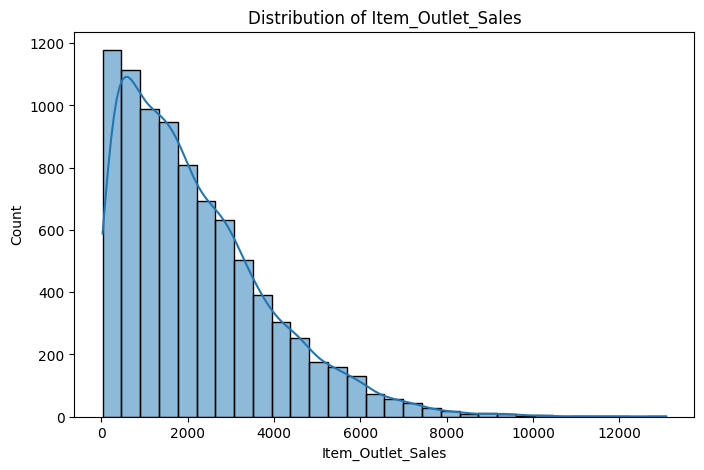

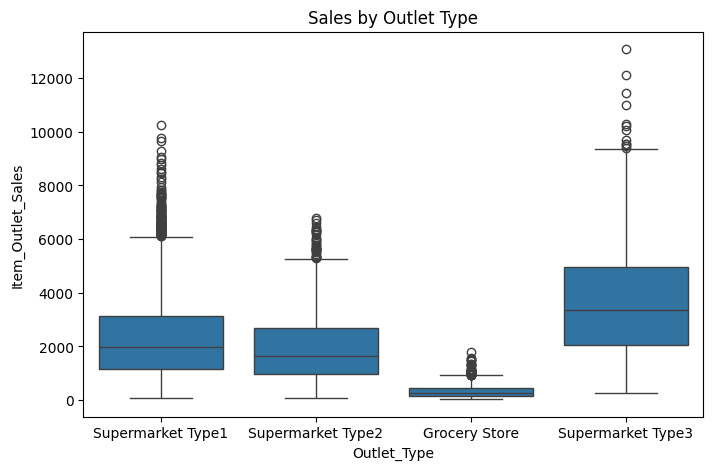

In [6]:
#Basic EDA
plt.figure(figsize=(8,5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribution of Item_Outlet_Sales")

plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title("Sales by Outlet Type")

In [7]:
#Handle Missing Data
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

/tmp/ipython-input-2010448208.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
/tmp/ipython-input-2010448208.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [8]:
#Feature Encoding & Split
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [9]:
#Baseline Model (XGBoost)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ('preprocess', preprocessor),
    ('xgb', XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.3f}, RMSE: {rmse:.2f}")

R²: 0.584, RMSE: 1063.41


In [10]:
#General Overview

#Summary statistics
df.describe()

#Number of unique values per column
df.nunique()


,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


Text(0.5, 1.0, 'Missing Values Heatmap')

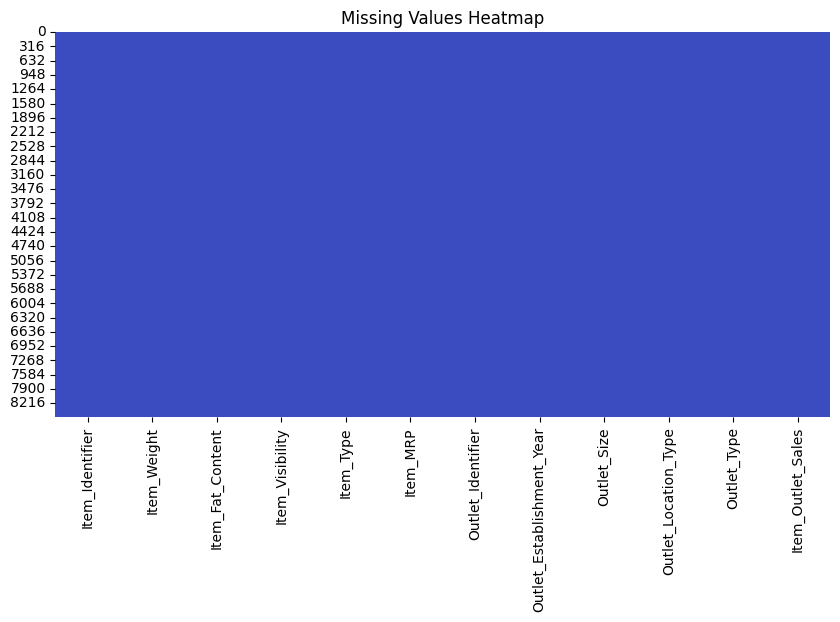

In [11]:
#Missing Values HitMap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")


Text(0.5, 1.0, 'Distribution of Item Outlet Sales')

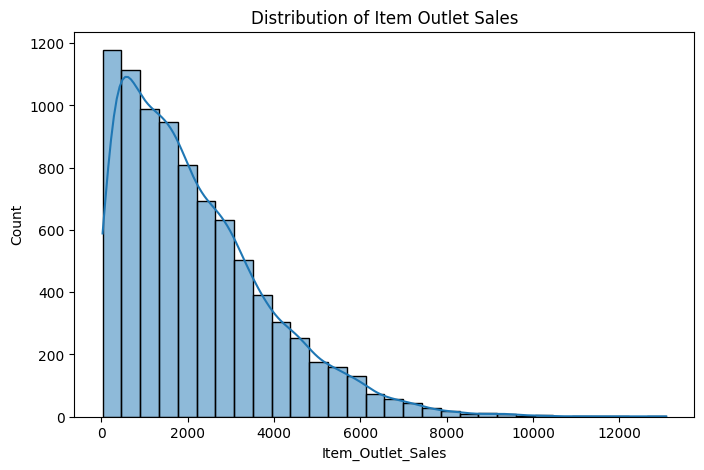

In [12]:
#Target Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribution of Item Outlet Sales")


([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

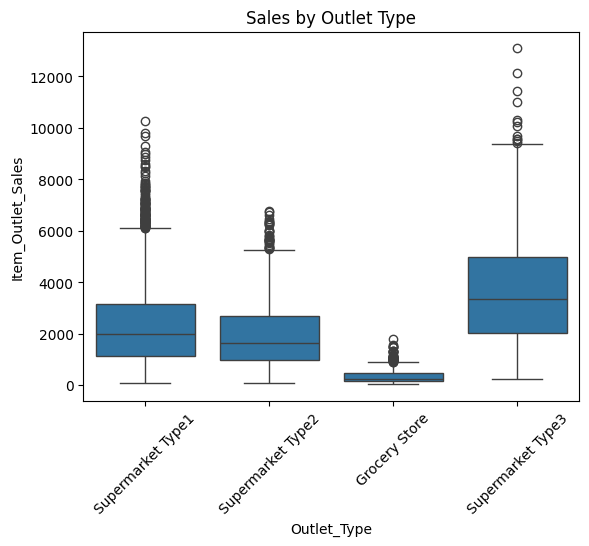

In [14]:
#Sales by Outlet Typeplt.figure(figsize=(8,5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title("Sales by Outlet Type")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Average Sales by Location Type')

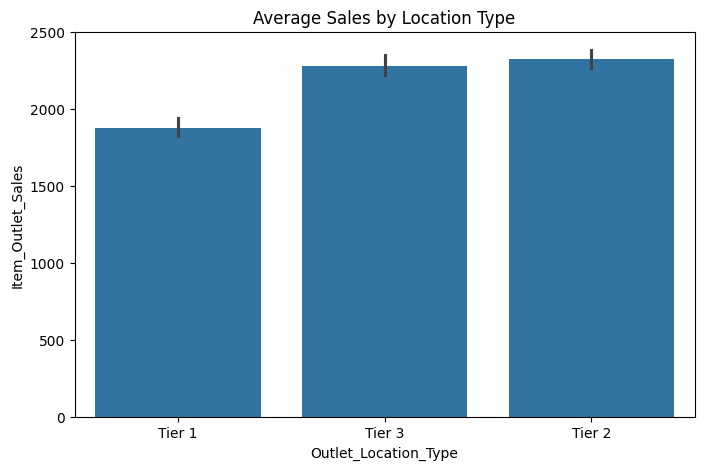

In [16]:
#Sales By Location
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, estimator='mean')
plt.title("Average Sales by Location Type")


Text(0.5, 1.0, 'Numeric Feature Correlations')

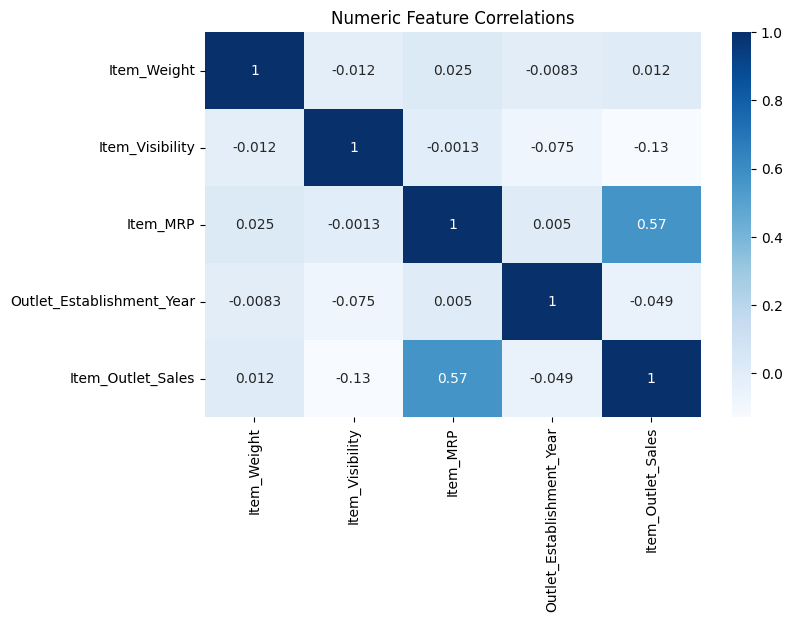

In [17]:
#Correlation For Numeric Features Only
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Numeric Feature Correlations")


In [18]:
#RandomizedSearchCV for XGBoost
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

#Define parameter grid
param_grid = {
    'xgb__n_estimators': [100, 200, 400],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0]
}

#Useing existing pipeline
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best R² score (CV):", random_search.best_score_)
print("Best Parameters:", random_search.best_params_)

#Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Test R²: {r2:.3f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best R² score (CV): 0.5925366535090749
Best Parameters: {'xgb__subsample': 0.7, 'xgb__n_estimators': 400, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.01, 'xgb__colsample_bytree': 0.7}
Test R²: 0.615
Test RMSE: 1023.58
Test MAE: 726.27


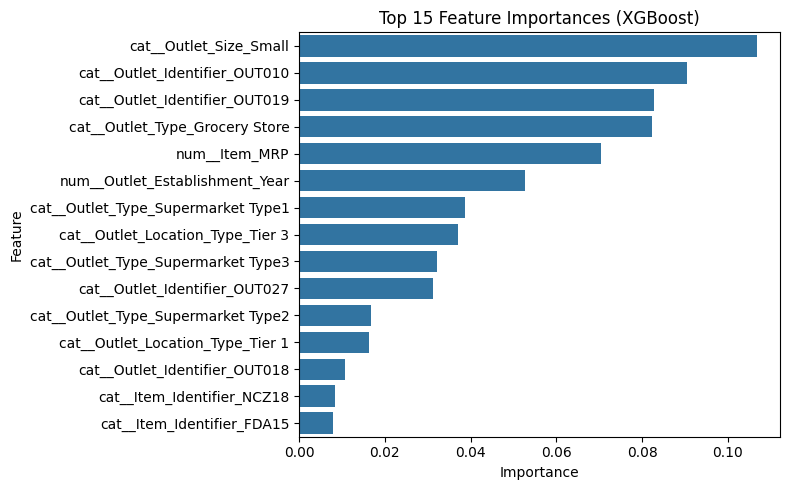

In [19]:
#Extract feature importances from the trained XGBoost model
xgb_model = best_model.named_steps['xgb']

importances = xgb_model.feature_importances_
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(y='Feature', x='Importance', data=feat_imp)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


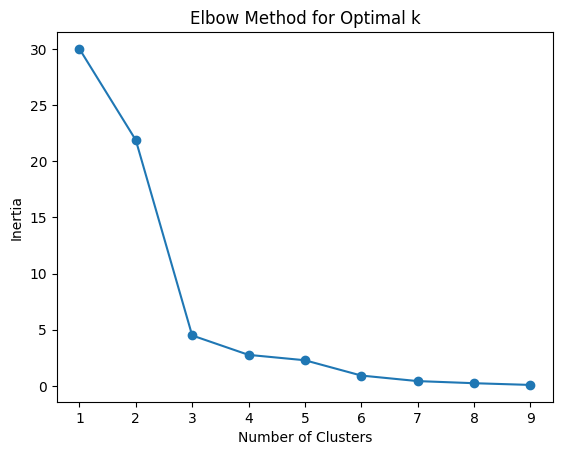

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#clustering outlets based on aggregated sales info
cluster_df = df.groupby('Outlet_Identifier')[['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility']].mean().reset_index()

#Standardize for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df[['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility']])

#Determine optimal k using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


         Item_Outlet_Sales    Item_MRP  Item_Visibility
Cluster                                                
0              2191.180765  141.528062         0.060478
1               339.840692  140.282341         0.104949
2              2794.356152  139.840203         0.060266
3              2438.841866  143.122481         0.061263


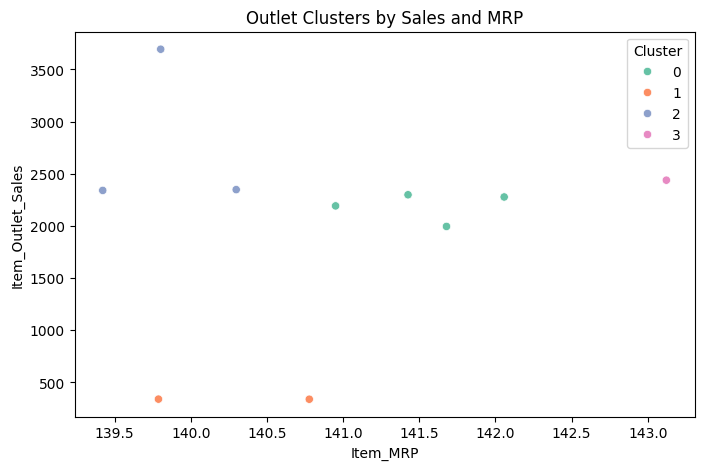

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(X_scaled)

#Average sales per cluster
cluster_summary = cluster_df.groupby('Cluster')[['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility']].mean()
print(cluster_summary)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Cluster', data=cluster_df, palette='Set2')
plt.title('Outlet Clusters by Sales and MRP')
plt.show()
